In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import shap
import joblib
#To remove warnings
import warnings
warnings.filterwarnings('ignore')

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [4]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [5]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [6]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [7]:
df.shape

(918, 12)

In [8]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [12]:
df.describe(include='all')

Age  Sex ChestPainType   RestingBP  Cholesterol   FastingBS  \
count   918.000000  918           918  918.000000   918.000000  918.000000   
unique         NaN    2             4         NaN          NaN         NaN   
top            NaN    M           ASY         NaN          NaN         NaN   
freq           NaN  725           496         NaN          NaN         NaN   
mean     53.510893  NaN           NaN  132.396514   198.799564    0.233115   
std       9.432617  NaN           NaN   18.514154   109.384145    0.423046   
min      28.000000  NaN           NaN    0.000000     0.000000    0.000000   
25%      47.000000  NaN           NaN  120.000000   173.250000    0.000000   
50%      54.000000  NaN           NaN  130.000000   223.000000    0.000000   
75%      60.000000  NaN           NaN  140.000000   267.000000    0.000000   
max      77.000000  NaN           NaN  200.000000   603.000000    1.000000   

       RestingECG       MaxHR ExerciseAngina     Oldpeak ST_Slope  \
count         918  918.000000            918  918.000000      918   
unique          3         NaN              2         NaN        3   
top        Normal         NaN              N         NaN     Flat   
freq          552         NaN            547         NaN      460   
mean          NaN  136.809368            NaN    0.887364      NaN   
std           NaN   25.460334            NaN    1.066570      NaN   
min           NaN   60.000000            NaN   -2.600000      NaN   
25%           NaN  120.000000            NaN    0.000000      NaN   
50%           NaN  138.000000            NaN    0.600000      NaN   
75%           NaN  156.000000            NaN    1.500000      NaN   
max           NaN  202.000000            NaN    6.200000      NaN   

        HeartDisease  
count     918.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.553377  
std         0.497414  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max         1.000000

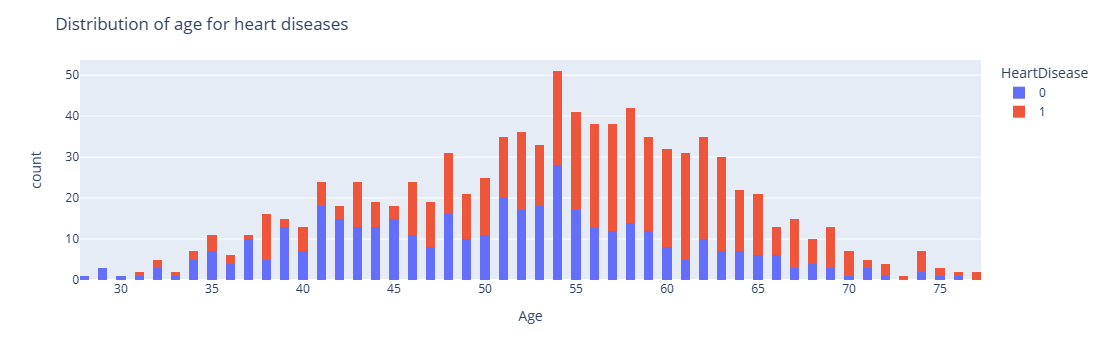

In [13]:
fig=px.histogram(df,x='Age',color='HeartDisease',nbins=100)
fig.update_layout(title_text='Distribution of age for heart diseases')
fig.show()

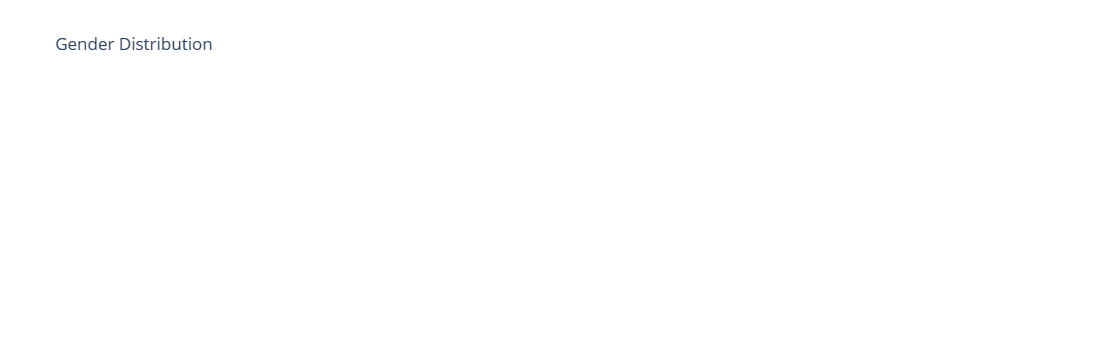

In [14]:
fig=px.pie(df,values='Sex',names='HeartDisease',title="Gender Distribution")
fig.show()

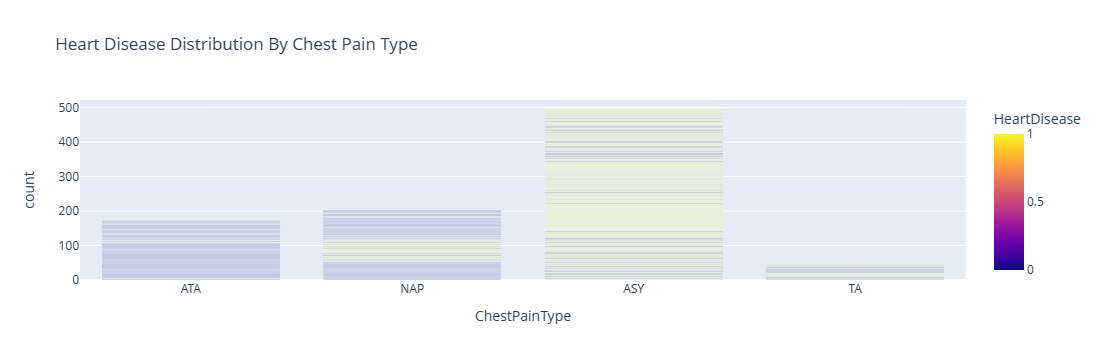

In [15]:
fig = px.bar(df, x="ChestPainType", color="HeartDisease", title="Heart Disease Distribution By Chest Pain Type")
fig.show()

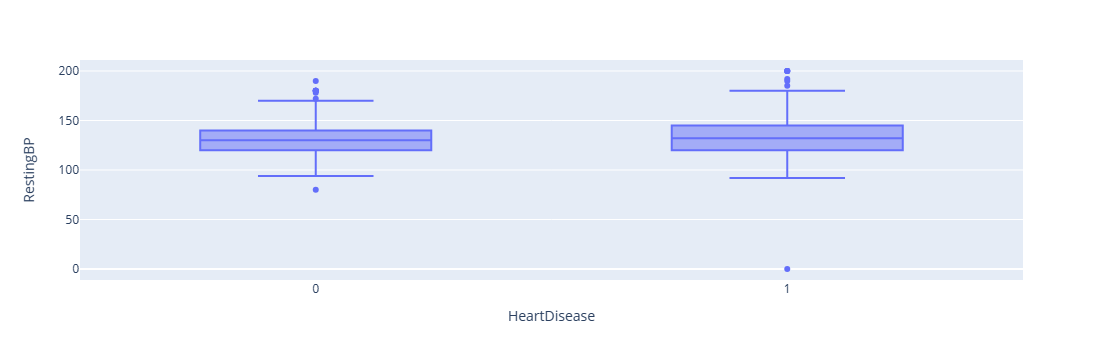

In [16]:
fig = px.box(df, x="HeartDisease", y="RestingBP")
fig.show()

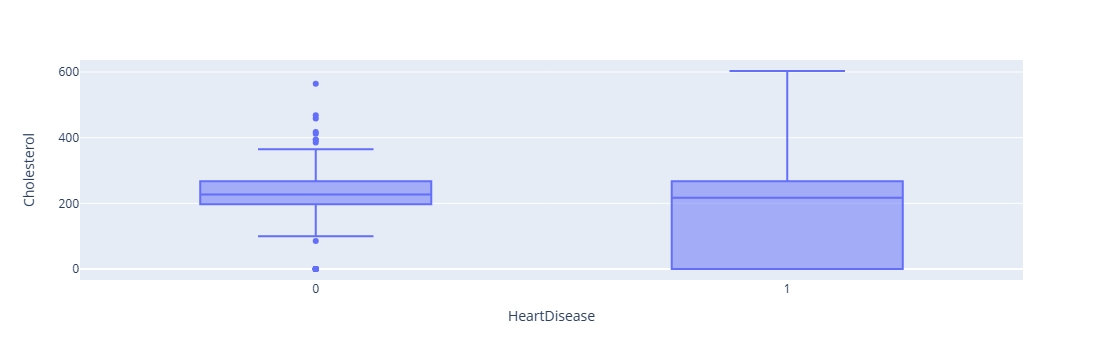

In [17]:
fig = px.box(df, x="HeartDisease", y="Cholesterol")
fig.show()

### Applying label encoding because classification models don't consider weights of input variables

In [18]:
label_encoder = LabelEncoder()
df['Sex']= label_encoder.fit_transform(df['Sex']) 
df['ChestPainType']= label_encoder.fit_transform(df['ChestPainType']) 
df['RestingECG']= label_encoder.fit_transform(df['RestingECG']) 
df['ExerciseAngina']= label_encoder.fit_transform(df['ExerciseAngina']) 
df['ST_Slope']= label_encoder.fit_transform(df['ST_Slope']) 

In [19]:
df.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


In [21]:
df.corr()

Age       Sex  ChestPainType  RestingBP  Cholesterol  \
Age             1.000000  0.055750      -0.077150   0.254399    -0.095282   
Sex             0.055750  1.000000      -0.126559   0.005133    -0.200092   
ChestPainType  -0.077150 -0.126559       1.000000  -0.020647     0.067880   
RestingBP       0.254399  0.005133      -0.020647   1.000000     0.100893   
Cholesterol    -0.095282 -0.200092       0.067880   0.100893     1.000000   
FastingBS       0.198039  0.120076      -0.073151   0.070193    -0.260974   
RestingECG     -0.007484  0.071552      -0.072537   0.022656    -0.196544   
MaxHR          -0.382045 -0.189186       0.289123  -0.112135     0.235792   
ExerciseAngina  0.215793  0.190664      -0.354727   0.155101    -0.034166   
Oldpeak         0.258612  0.105734      -0.177377   0.164803     0.050148   
ST_Slope       -0.268264 -0.150693       0.213521  -0.075162     0.111471   
HeartDisease    0.282039  0.305445      -0.386828   0.107589    -0.232741   

                FastingBS  RestingECG     MaxHR  ExerciseAngina   Oldpeak  \
Age              0.198039   -0.007484 -0.382045        0.215793  0.258612   
Sex              0.120076    0.071552 -0.189186        0.190664  0.105734   
ChestPainType   -0.073151   -0.072537  0.289123       -0.354727 -0.177377   
RestingBP        0.070193    0.022656 -0.112135        0.155101  0.164803   
Cholesterol     -0.260974   -0.196544  0.235792       -0.034166  0.050148   
FastingBS        1.000000    0.087050 -0.131438        0.060451  0.052698   
RestingECG       0.087050    1.000000 -0.179276        0.077500 -0.020438   
MaxHR           -0.131438   -0.179276  1.000000       -0.370425 -0.160691   
ExerciseAngina   0.060451    0.077500 -0.370425        1.000000  0.408752   
Oldpeak          0.052698   -0.020438 -0.160691        0.408752  1.000000   
ST_Slope        -0.175774   -0.006778  0.343419       -0.428706 -0.501921   
HeartDisease     0.267291    0.057384 -0.400421        0.494282  0.403951   

                ST_Slope  HeartDisease  
Age            -0.268264      0.282039  
Sex            -0.150693      0.305445  
ChestPainType   0.213521     -0.386828  
RestingBP      -0.075162      0.107589  
Cholesterol     0.111471     -0.232741  
FastingBS      -0.175774      0.267291  
RestingECG     -0.006778      0.057384  
MaxHR           0.343419     -0.400421  
ExerciseAngina -0.428706      0.494282  
Oldpeak        -0.501921      0.403951  
ST_Slope        1.000000     -0.558771  
HeartDisease   -0.558771      1.000000

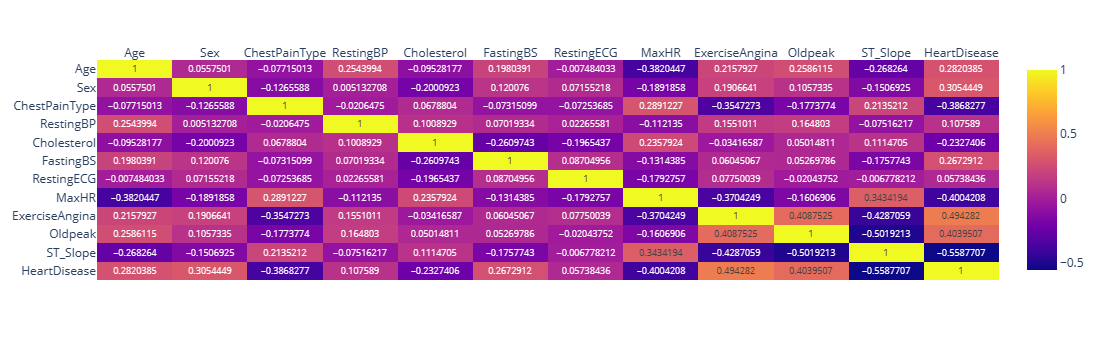

In [22]:
fig = px.imshow(df.corr(),aspect="auto",text_auto=True)
fig.update_xaxes(side="top")
fig.show()

In [23]:
df.shape

(918, 12)

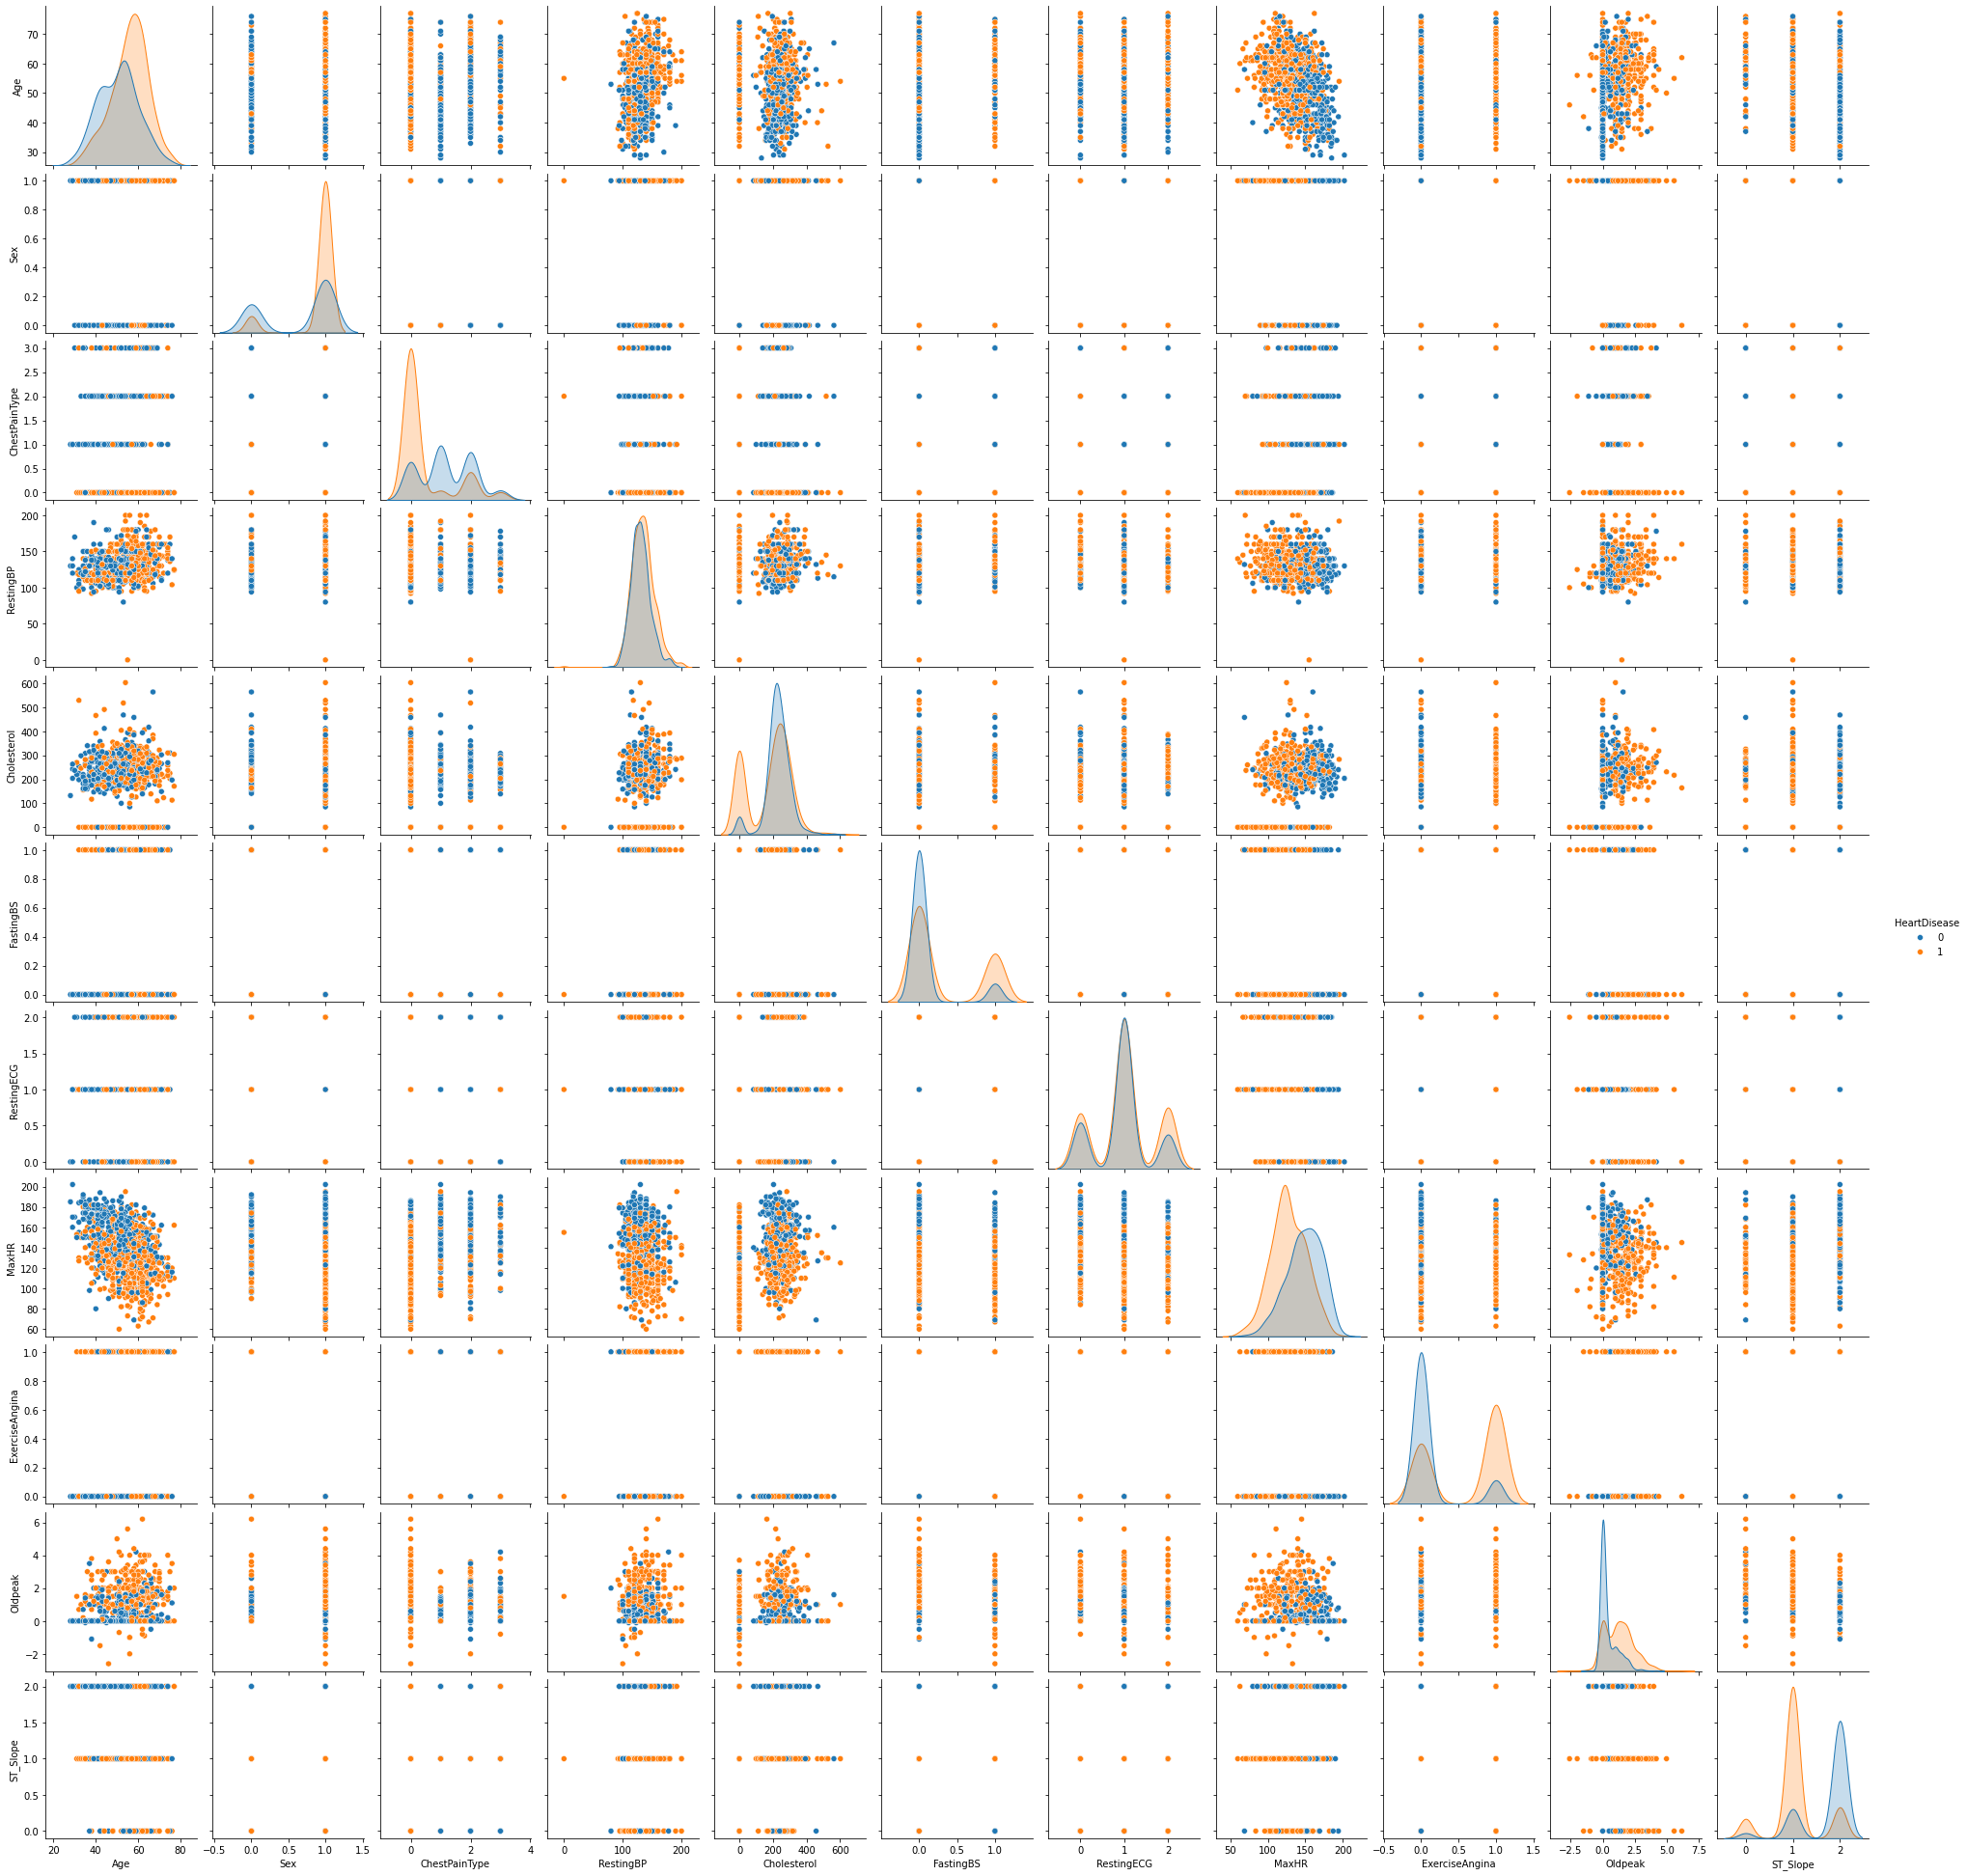

In [24]:
sns.pairplot(data=df,hue='HeartDisease')

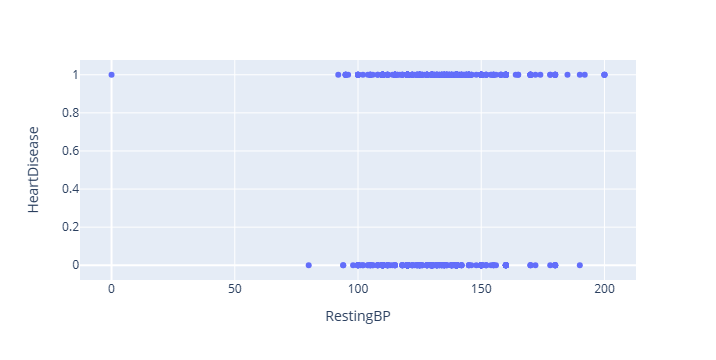

In [25]:
fig=px.scatter(df,x='RestingBP',y='HeartDisease')
fig.show()

In [26]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [27]:
# X = df[['Age', 'Sex', 'ChestPainType', 'Cholesterol', 'FastingBS',
#        'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
X = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
y = df[['HeartDisease']]

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.333)

In [29]:
X_train.shape

(612, 11)

In [30]:
X_test.shape

(306, 11)

In [31]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [32]:
logistic.score(X_test,y_test)

0.8627450980392157

In [33]:
shap.initjs()


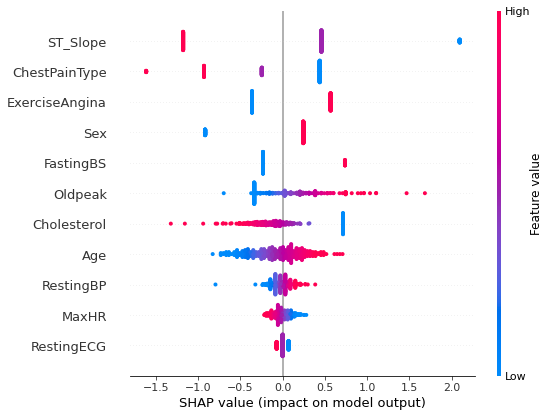

In [34]:
shap_explainer = shap.Explainer(logistic,X_train)
shap_values = shap_explainer(X_test)
shap.summary_plot(shap_values)

In [35]:
decision = DecisionTreeClassifier()
decision.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
decision.score(X_test,y_test)

0.7777777777777778

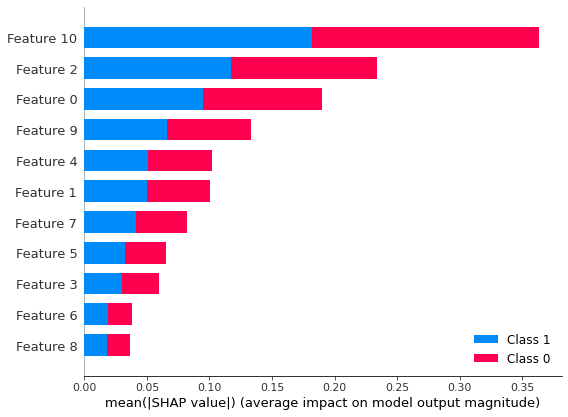

In [37]:
shap_explainer = shap.TreeExplainer(decision,X_train)
shap_values = shap_explainer.shap_values(X_test)
shap.summary_plot(shap_values)

In [38]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
forest.score(X_test,y_test)

0.869281045751634

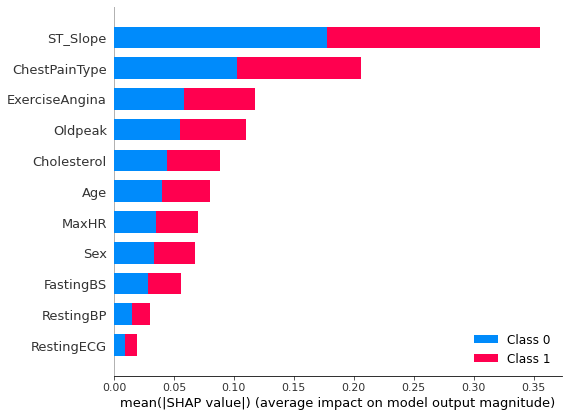

In [40]:
shap_explainer = shap.TreeExplainer(forest)
shap_values = shap_explainer.shap_values(X)
shap.summary_plot(shap_values, X)

In [41]:
gradientBoost = GradientBoostingClassifier()
gradientBoost.fit(X_train,y_train)

GradientBoostingClassifier()

In [42]:
gradientBoost.score(X_test,y_test)

0.8758169934640523

In [47]:
joblib.dump(gradientBoost,'gradientBoost_model.joblib')

['gradientBoost_model.joblib']

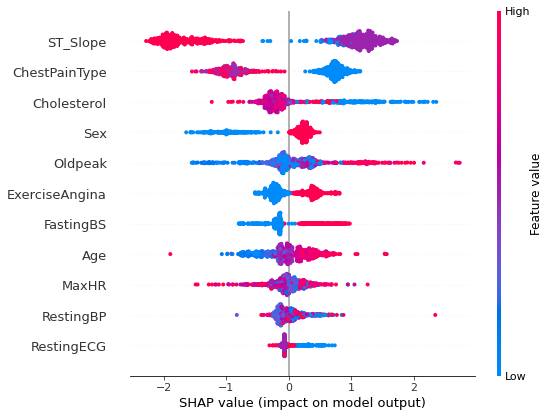

In [43]:
shap_explainer = shap.TreeExplainer(gradientBoost)
shap_values = shap_explainer.shap_values(X)
shap.summary_plot(shap_values, X)

In [44]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [45]:
xgb.score(X_test,y_test)

0.8758169934640523

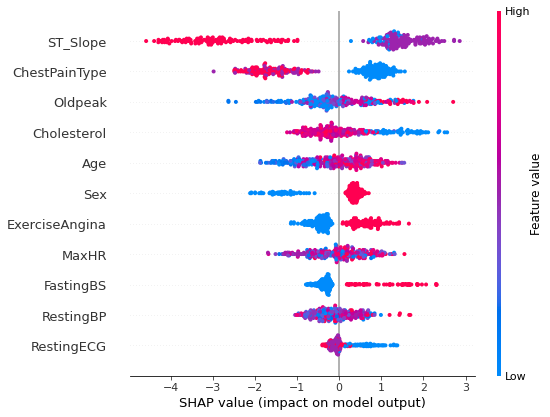

In [46]:
shap_explainer = shap.Explainer(xgb,X_train)
shap_values = shap_explainer(X_test)
shap.summary_plot(shap_values)